# Phân Cụm K-Means

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành lab này, bạn sẽ có thể:

-   Sử dụng Phân cụm K-Means của scikit-learn để phân cụm dữ liệu


## Giới thiệu

Có rất nhiều mô hình **phân cụm** khác nhau. Trong notebook này, chúng ta sẽ tìm hiểu mô hình được coi là đơn giản nhất trong số đó. Dù đơn giản nhưng **K-means** được sử dụng rộng rãi để phân nhóm trong nhiều ứng dụng khoa học dữ liệu, và đặc biệt hữu ích nếu bạn cần nhanh chóng khám phá thông tin chi tiết từ **dữ liệu không được gắn nhãn**. Trong notebook này, bạn sẽ học cách sử dụng k-Means để phân khúc khách hàng.

Một số ứng dụng thực tế của k-means:

- Phân khúc khách hàng
- Hiểu những gì khách truy cập trang web đang cố gắng đạt được
- Nhận dạng mẫu
- Machine Learning (Học máy)
- Nén dữ liệu

Trong notebook này, chúng ta thực hành phân cụm k-mean với 2 ví dụ:

- k-means trên một tập dữ liệu được tạo ngẫu nhiên
- Sử dụng k-means để phân khúc khách hàng


<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">k-Means trên một tập dữ liệu được tạo ngẫu nhiên</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Thiết lập K-Means</a></li>
                <li><a href="#creating_visual_plot">Tạo một biểu đồ trực quan</a></li>
            </ol>
        <li><a href="#customer_segmentation_K_means">Phân khúc khách hàng với K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Tiền xử lý</a></li>
                <li><a href="#modeling">Mô hình hóa</a></li>
                <li><a href="#insights">Chuyên sâu</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import thư viện
Trước tiên hãy import các thư viện cần thiết.
Đồng thời chạy <b>%matplotlib inline </b> vì chúng ta sẽ vẽ biểu đồ phân này.


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means trên một tập dữ liệu được tạo ngẫu nhiên</h1>

Hãy tạo tập dữ liệu của riêng chúng ta cho lab này!


Đầu tiên chúng ta cần thiết lập một seed ngẫu nhiên. Sử dụng hàm <b>numpy's random.seed()</b>, nơi seed sẽ được đặt thành <b>0</b>


In [2]:
np.random.seed(0)

Tiếp theo, chúng ta sẽ tạo <i>random cluster</i> (cụm ngẫu nhiên) của các điểm bằng lớp <b>make_blobs</b> . Lớp <b>make_blobs</b>  có thể nhận nhiều đầu vào (input), nhưng chúng ta sẽ sử dụng vào những đầu vào cụ thể này. <br> <br>
<b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: Tổng số điểm được chia đều cho các cụm. </li>
    <ul> <li> Giá trị sẽ là: 5000 </li> </ul>
    <li> <b>centers</b>: Số lượng tâm để tạo hoặc các vị trí tâm cố định. </li>
    <ul> <li> Giá trị sẽ là: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: Độ lệch chuẩn của các cụm. </li>
    <ul> <li> Giá trị sẽ là: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Mảng có shape [n_samples, n_features]. (Ma trận Feature)</li>
    <ul> <li> Các mẫu được tạo. </li> </ul> 
    <li> <b>y</b>: Mảng có shape [n_samples]. (Véc tơ phản hồi)</li>
    <ul> <li> Các nhãn số nguyên cho thành phần cụm của từng mẫu. </li> </ul>
</ul>


In [7]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.7)

Hiển thị biểu đồ phân tán với dữ liệu được tạo ngẫu nhiên.


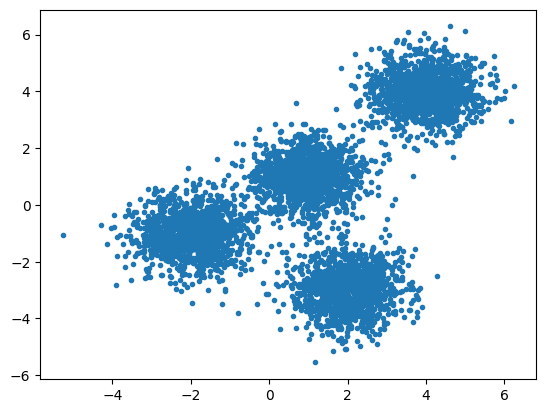

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Thiết lập K-Means</h2>
Bây giờ chúng ta đã có dữ liệu ngẫu nhiên, hãy thiết lập phân cụm K-Means.


Lớp KMeans có nhiều tham số có thể dùng, nhưng chúng ta sẽ sử dụng 3 tham số sau:

<ul>
    <li> <b>init</b>: Phương thức khởi tạo của centroid. </li>
    <ul>
        <li> Giá trị sẽ là: "k-means++" </li>
        <li> k-means++: Chọn các tâm cụm ban đầu cho phân cụm k-mean theo cách thông minh để tăng tốc độ hội tụ.</li>
    </ul>
    <li> <b>n_clusters</b>: Số lượng các cụm sẽ hình thành cũng như số lượng centroid cần tạo ra. </li>
    <ul> <li> Giá trị sẽ là: 4 (vì chúng ta có 4 tâm)</li> </ul>
    <li> <b>n_init</b>: Số lần thuật toán k-mean sẽ được chạy với các seed centroid khác nhau. Kết quả cuối cùng sẽ là output tốt nhất của n_init lần chạy liên tiếp về quán tính. </li>
    <ul> <li> Giá trị sẽ là: 12 </li> </ul>
</ul>

hãy khởi tạo KMeans với các tham số này, trong đó tham số đầu ra được gọi là <b>k_means</b>.


In [18]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Bây giờ, hãy điều chỉnh mô hình KMeans với ma trận đặc trưng đã tạo ở trên, <b> X </b>


In [19]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Giờ hãy lấy các nhãn cho từng điểm trong mô hình bằng cách sử dụng thuộc tính <b> .labels_ </b> của KMeans và lưu nó dưới dạng <b> k_means_labels </b> 


In [15]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, ..., 1, 0, 0])

In [21]:
import pandas as pd
pd.Series(k_means_labels).unique()

array([1, 2, 0, 3])

Chúng ta cũng sẽ lấy tọa độ của các tâm cụm bằng  <b>.cluster_centers_</b> của KMeans và lưu nó dưới dạng <b>k_means_cluster_centers</b>


In [16]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 2.00522704, -2.98882336],
       [-1.9812355 , -1.04110158],
       [ 3.99098629,  3.98835466],
       [ 0.9807223 ,  1.00060053]])

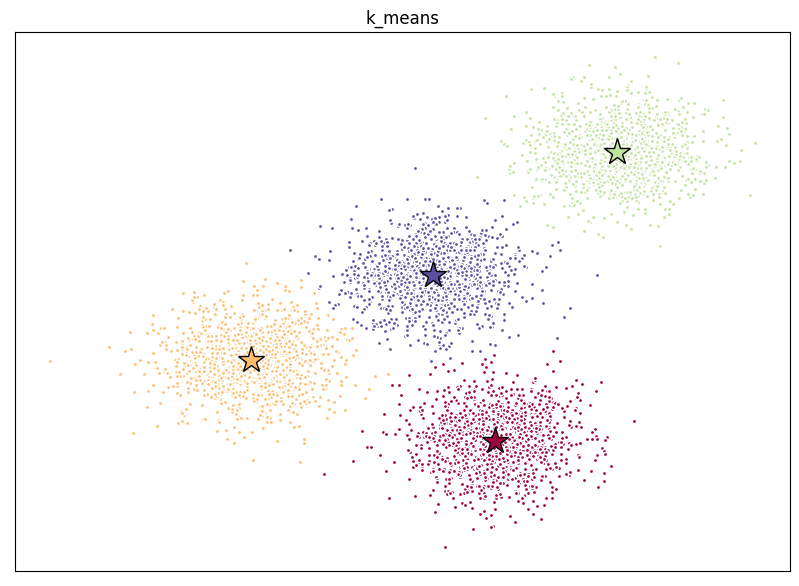

In [48]:
# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
fig = plt.figure(figsize=(10, 7))
classes = pd.Series(k_means.labels_).unique()
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, color in enumerate(colors):

    my_class = k_means_labels == k
    ax.plot(X[my_class, 0], X[my_class, 1], 'w', markerfacecolor=color, marker='.')
    ax.plot(k_means_cluster_centers[k][0], k_means_cluster_centers[k][1], color=color, markeredgecolor='k', markersize=20, marker="*")
ax.set_title("k_means")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [68]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], '.k', marker='.', markersize=2)
def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(kmeans, X,  resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(kmeans.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)        


C:\Users\ngoct\AppData\Local\Temp\ipykernel_10080\2218063764.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".k" (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[:, 0], X[:, 1], '.k', marker='.', markersize=2)


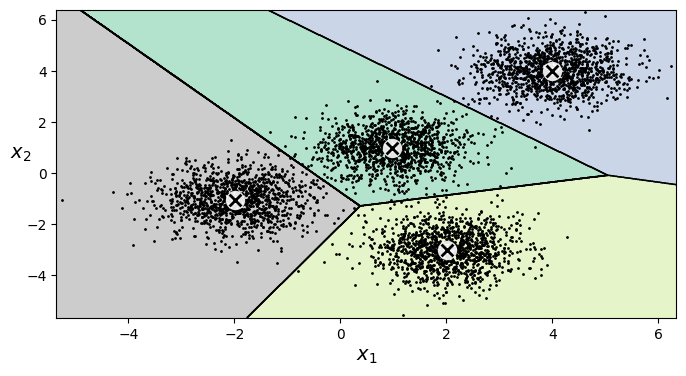

In [69]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(k_means, X)
plt.show()

<h2 id="creating_visual_plot">Tạo biểu đồ trực quan</h2>

Chúng ta đã tạo dữ liệu ngẫu nhiên và khởi tạo mô hình KMeans, hãy vẽ biểu đồ và xem nó trông như thế nào!


Vui lòng đọc qua code và chú thích để hiểu cách vẽ sơ đồ mô hình.


C:\Users\ngoct\AppData\Local\Temp\ipykernel_10080\37429023.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=20, marker='*')


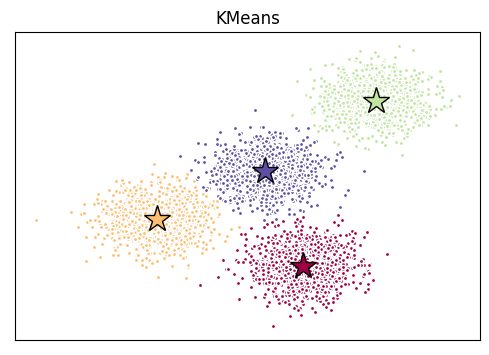

In [38]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=20, marker='*')

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Thực hành

Cố gắng phân cụm tập dữ liệu trên thành 3 cụm.
Lưu ý: không tạo lại dữ liệu, sử dụng cùng một tập dữ liệu như trên.


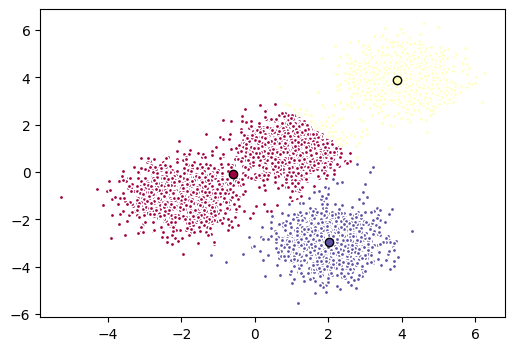

In [72]:
# Nhập code của bạn ở đây

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 100)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

<details><summary>Click vào đây để xem lời giải</summary>

```python
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

```

</details>


<h1 id="customer_segmentation_K_means">Phân khúc khách hàng với K-Means</h1>

Hãy tưởng tượng rằng bạn có tập dữ liệu khách hàng và bạn cần áp dụng phân khúc khách hàng trên dữ liệu này.
Phân khúc khách hàng là việc thực hành phân chia cơ sở khách hàng thành các nhóm cá nhân có các đặc điểm giống nhau. Đây là một chiến lược quan trọng vì doanh nghiệp có thể nhắm mục tiêu đến những nhóm khách hàng cụ thể này và phân bổ hiệu quả các nguồn lực tiếp thị. Ví dụ: một nhóm có thể chứa những khách hàng có lợi nhuận cao và ít rủi ro, tức là có nhiều khả năng mua sản phẩm hoặc đăng ký dịch vụ hơn. Nhiệm vụ kinh doanh là giữ chân những khách hàng đó. Một nhóm khác có thể bao gồm khách hàng từ các tổ chức phi lợi nhuận...


### Load dữ liệu từ tệp CSV 

Trước khi có thể làm việc với dữ liệu Cust_Segmentation.csv.


In [73]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Tiền xử lý (Pre-precessing)</h2


Như bạn có thể thấy, **Address** trong tập dữ liệu này là một biến phân loại. Thuật toán k-mean không áp dụng trực tiếp cho các biến phân loại vì hàm khoảng cách Euclide không thực sự có ý nghĩa đối với các biến rời rạc. Vì vậy, hãy bỏ tính năng này và chạy phân cụm.


In [74]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Chuẩn hóa trên độ lệch chuẩn

Bây giờ hãy chuẩn hóa tập dữ liệu. Nhưng tại sao chúng ta cần chuẩn hóa ngay từ đầu? Chuẩn hóa (Normalization) là một phương pháp thống kê giúp các thuật toán dựa trên toán học giải thích các đặc trưng có quy mô và phân bố khác nhau như nhau. Chúng ta sử dụng **StandardScaler()** để chuẩn hóa tập dữ liệu.


In [78]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [80]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Mô hình hóa</h2>


Trong trường hợp nếu chúng ta không có quyền truy cập vào thuật toán k-means sẽ giống như việc đoán rằng mỗi nhóm khách hàng sẽ có độ tuổi, thu nhập, trình độ học vấn nhất định,..., với nhiều kiểm tra và thử nghiệm. Tuy nhiên, chúng ta có thể thực hiện tất cả quá trình này dễ dàng hơn nhiều với phân cụm K-means.

Hãy áp dụng k-means trên tập dữ liệu và xem xét các nhãn cụm.


In [89]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 3 4 1 2 3 4 3 1 0 3 4 1 1 1 1 1 1 3 1 1 4 4 3 0 3 1 4 4 4 3 4 4 1 4 4 4
 1 1 0 1 0 1 0 1 3 1 1 1 4 3 1 1 3 3 1 1 1 3 4 4 4 3 3 1 4 3 1 1 1 4 3 3 4
 1 1 4 1 0 4 3 3 0 4 4 1 1 1 1 1 3 1 1 1 1 4 1 4 1 1 1 0 4 4 1 4 1 1 4 3 4
 1 4 1 1 1 1 4 3 1 1 1 1 4 4 3 4 1 1 1 4 4 1 1 1 1 3 1 1 4 4 1 4 1 3 1 4 4
 4 1 4 4 1 1 3 4 0 3 1 4 1 4 3 4 1 1 4 1 1 4 3 1 1 4 1 1 4 1 1 3 4 4 1 0 1
 4 1 1 4 3 1 4 3 1 3 1 1 3 2 1 0 1 1 1 1 4 1 2 3 1 1 4 4 3 1 1 3 3 4 4 1 0
 1 1 1 1 3 1 1 4 4 1 4 1 3 1 4 1 4 1 1 4 1 1 1 0 3 4 4 1 1 1 1 1 3 4 4 1 1
 1 1 3 4 4 3 4 4 3 1 4 1 1 4 4 1 1 1 4 1 1 1 0 0 1 3 1 3 1 3 4 1 4 1 4 1 1
 1 1 1 3 3 3 1 1 1 4 4 1 4 4 4 1 1 1 4 1 1 1 4 1 3 1 3 1 1 4 1 1 3 4 4 0 1
 1 4 1 1 3 1 4 4 4 1 1 3 4 1 3 1 1 0 1 4 1 1 4 3 1 1 1 0 1 1 1 3 1 3 0 0 4
 1 1 3 1 1 1 1 4 1 1 1 1 1 1 0 1 3 1 1 1 1 4 4 4 1 4 1 0 4 1 1 1 1 1 1 4 4
 4 3 1 4 4 4 1 1 4 3 1 4 1 4 3 1 1 3 4 1 1 4 1 4 1 1 1 3 1 1 1 3 4 4 4 1 2
 4 4 4 4 4 4 3 1 1 1 0 1 1 1 1 4 4 0 1 1 1 1 3 1 4 4 3 4 4 3 4 1 4 1 1 1 4
 1 3 1 1 1 4 3 1 1 1 3 4 

<h2 id="insights">Chuyên sâu</h2>

Hãy gán nhãn cho mỗi hàng trong khung dữ liệu.


In [90]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,20.9,4
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


Chúng ta có thể dễ dàng kiểm tra các giá trị centroid bằng cách lấy trung bình các đặc trưng trong mỗi cụm.


In [91]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,407.404762,44.285714,2.309524,19.571429,133.690476,4.196357,8.347976,0.133333,9.473810
1,432.051044,31.078886,1.605568,4.352668,24.461717,0.814819,1.660789,0.311295,10.169838
2,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
3,404.841270,41.055556,1.944444,14.396825,77.404762,2.942722,5.353960,0.186275,10.979365
4,426.576763,36.850622,1.647303,10.609959,45.867220,1.507220,3.079631,0.222222,9.955602


Bây giờ, hãy xem sự phân bổ khách hàng dựa trên độ tuổi và thu nhập:


C:\Users\ngoct\AppData\Local\Temp\ipykernel_10080\4248688761.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


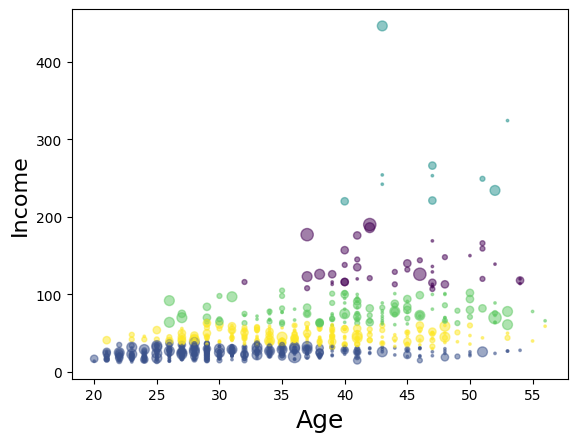

In [92]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


C:\Users\ngoct\AppData\Local\Temp\ipykernel_10080\546968922.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


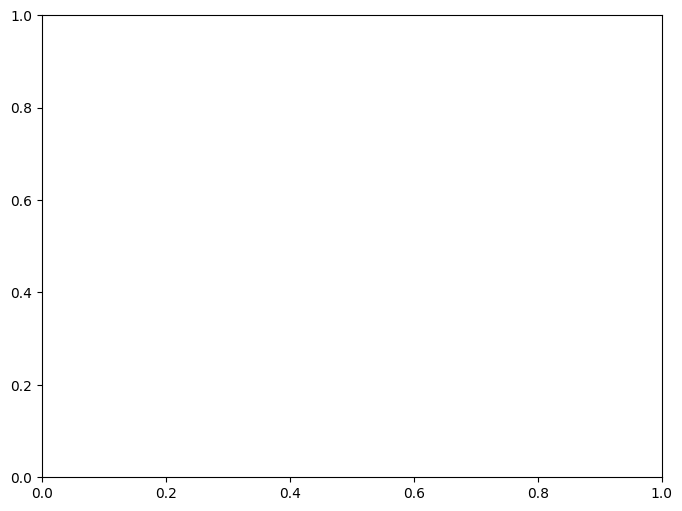

In [88]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means sẽ phân chia khách hàng của bạn thành các nhóm loại trừ lẫn nhau, chẳng hạn, thành 3 cụm. Khách hàng trong mỗi cụm tương tự nhau về mặt nhân khẩu học.
Bây giờ chúng ta có thể tạo hồ sơ cho từng nhóm, xem xét các đặc điểm chung của từng cụm.
Ví dụ, 3 cụm có thể là:

-   AFFLUENT (THU NHẬP CAO), EDUCATED (CÓ HỌC VẤN) VÀ OLD AGED (GIÀ)
-   MIDDLE AGED (TRUNG NIÊN) VÀ MIDDLE INCOME (THU NHẬP TRUNG BÌNH)
-   YOUNG (TRẺ) VÀ LOW INCOME (THU NHẬP THẤP)


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**